# Seaborn Grid Plots

In this chapter, we continue our coverage of seaborn by focusing on plotting functions that return 'grids'. These are seaborn objects that wrap matplotlib's figure and usually contain more than one axes. There are a few different kinds of grids; some plot each group on a different axes, while others enhance the main plot on the axes.

## Grids by categories

Many grid plotting functions split the data by unique category values. Take a look at the [Categorical section][0] of the API. The very top function, `catplot`, is the only grid plot in that group. The others are axes plots. The `catplot` function is capable of making each of the other plots in its section. It can be thought of as a 'metaplotting' function, as it just uses the other underlying plots in its section. Let's start with `catplot` and read in our Airbnb listings data setting the style to whitegrid.

[0]: https://seaborn.pydata.org/api.html#categorical-plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid', rc={'figure.figsize': (5, 2.7), 'figure.dpi': 127}, 
              font_scale=0.8)
airbnb = pd.read_csv('../data/airbnb.csv')
airbnb.head(3)

,id,neighborhood,room_type,accommodates,bedrooms,price,security_deposit,cleaning_fee,rating,superhost,response_time,acceptance_rate,host_since,last_review,num_reviews,latitude,longitude,minimum_nights,maximum_nights
0,3686,Historic Anacostia,Private room,1,1.0,55,25,25,4.60,0,a few days or more,67%,2008-11-26,2021-08-09,76,38.86339,-76.98889,2,365
1,3943,Edgewood,Private room,2,1.0,71,50,0,4.81,0,NaN,NaN,2008-12-12,2021-09-11,434,38.91195,-77.00456,2,1125
2,4529,Eastland Gardens,Private room,4,1.0,54,25,50,4.66,0,within a few hours,NaN,2008-12-30,2019-07-05,102,38.90585,-76.94469,30,180


### Set the `kind` parameter

The `kind` parameter of `catplot` must be set to one of the following options: 'point', 'bar', 'strip', 'swarm', 'box', 'violin', or 'boxen'. Let's create a bar plot of the median price by number of persons each listing accommodates of those that accommodate four or less further splitting by superhost. The following creates a simple seaborn grid with a single axes, which we assign to a variable.

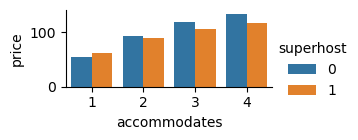

In [2]:
grid = sns.catplot(kind='bar', x='accommodates', y='price', hue='superhost',
                   data=airbnb, order=[1, 2, 3, 4], estimator=np.median,
                   ci=None, height=1.5, aspect=2)

Let's verify that a seaborn grid was returned.

In [3]:
type(grid)

seaborn.axisgrid.FacetGrid

Access the underlying matplotlib figure with the `fig` attribute.

In [4]:
fig = grid.fig
type(fig)

matplotlib.figure.Figure

Return all axes in the figure as a list with the `axes` attribute.

In [5]:
fig.axes

[<AxesSubplot:xlabel='accommodates', ylabel='price'>]

We can change properties of this axes and then output the figure again.

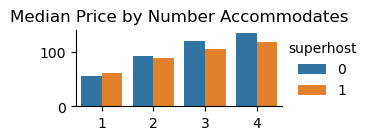

In [6]:
fig.axes[0].set(xlabel='', ylabel='', title='Median Price by Number Accommodates')
fig

### Control figure size with `height` and `aspect`

The parameters `height` and `aspect` are used to control the height and width of each axes and ultimately, the entire figure. By default, `height` is set to 5 inches. The `aspect` controls the ratio of width to height and is set to 1 by default. Multiplying the height by the aspect ratio gets the width of each axes (5 x 5 by default). Above, the height was set to 1.5 inches and aspect to 2 which made the width 3 inches. Let's verify the dimensions. The legend is responsible for adding a little extra width.

In [7]:
fig.get_size_inches()

array([3.79736111, 1.5       ])

The above plot can be duplicated directly with the `barplot` axes function.

In [8]:
fig, ax = plt.subplots(figsize=(3, 1.5))
sns.barplot(x='accommodates', y='price', data=airbnb, hue='superhost', 
            order=[1, 2, 3, 4], estimator=np.median, ci=None, ax=ax)
ax.set(xlabel='', ylabel='', title='Median Price by Number Accommodates');

NameError: name 'plt' is not defined

### Creating multiple axes with `row` and `col`

The main reason to use `catplot` is to split your data into multiple axes using the `row` and/or `col` parameters. These should be set to a categorical column name. We set `col` to neighborhood which would create a new axes for each neighborhood. But, we limit it to just the most frequent six neighborhoods with `col_order`.

In [ ]:
top6 = airbnb['neighborhood'].value_counts().index[:6]
grid = sns.catplot(kind='bar', x='accommodates', y='price', data=airbnb, 
                   order=[1, 2, 3, 4], hue='superhost', col='neighborhood', 
                   col_order=top6, estimator=np.median, ci=None, height=1.5)

We have six axes each with a height and width of 1.5, so the entire figure size should be around 9 x 1.5 plus some extra width for the legend.

In [ ]:
grid.fig.get_size_inches()

By default, all axes will be placed on a single row. Change this by setting the maximum number of axes per row with `col_wrap`. The seaborn grid object has a number of helper methods to set multiple properties at once. Here, we pass `set_titles` a string template to display just the neighborhood name. We also add a title to the entire figure by accessing the figure and calling its `suptitle` method.

In [ ]:
grid = sns.catplot(kind='bar', x='accommodates', y='price', data=airbnb, 
                   order=[1, 2, 3, 4], hue='superhost', col='neighborhood', 
                   col_order=top6, col_wrap=3, estimator=np.median, ci=None, 
                   height=1.5, aspect=1.2)
grid.set_titles('{col_name}')
grid.fig.suptitle('Washington D.C. Airbnb Listings by Neighborhood', y=1.03);

We made each plot a bit wider by changing the aspect ratio to 1.2. Now that there are two rows, the total height of the figure has doubled from 1.5 to 3. Let's verify these changes in the figure size.

In [ ]:
grid.fig.get_size_inches()

It's possible to set both `row` and `col` simultaneously to different categorical variables. The size of the grid is determined automatically from the number of unique values in each. Let's use `catplot` to create a separate axes for each unique combination of neighborhood and room type counting the number of listings by persons accommodated and minimum nights. First, we get the two most common room types.

In [ ]:
properties = airbnb['room_type'].value_counts().index[:2]
properties

We substantially cut down on the number of axes and bars by using the parameters that end in `order`. By default, all x and y axis limits are shared. The `sharex` and `sharey` boolean parameters can be set to `False` so that each axes sets it own limits. Here, each axes sets its own y-axis limits, though this isn't usually good practice as it makes for more difficult comparisons. Setting `margin_titles` to `True` places the titles of each row along the top and right side of the grid instead of on every axes.

In [ ]:
sns.catplot(kind='count', x='accommodates', data=airbnb, 
            order=[1, 2, 3, 4], hue='minimum_nights', hue_order=[1, 2, 3],
            col='neighborhood', col_order=top6[:3], 
            row='room_type', row_order=properties,
            height=2, aspect=1.8, sharey=False, margin_titles=True);

## Scatter and line plot grids

The `relplot` function creates scatter and line plots within a grid in a very similar fashion as `catplot`. Choose the underlying plot by setting `kind` to either `'scatter'` or `'line'` Use the `row` and `col` parameters to split the data into separate axes. Here, we plot the location of every listing by room type and persons it accommodates. The size is controlled by price and color by rating.

In [ ]:
sns.relplot(x='longitude', y='latitude', kind='scatter', data=airbnb.query('price < 500'),
            size='price', size_norm=(100, 300),
            hue='rating',
            col='accommodates', col_order=[1, 2, 3, 4],
            row='room_type', row_order=properties, height=2.5);

### Line plots with `relplot`

Let's make a single line plot on each axes showing the total number of COVID-19 deaths for the first 10 days after the 50th death for each country.

In [ ]:
full_covid = pd.read_csv('../data/covid/full_covid_data.csv', parse_dates=['date'])
full_covid.tail(3)

We begin by selecting the countries with 10 or more days of over 50 deaths.

In [ ]:
df = full_covid.query('total_deaths >= 50')
df = df.groupby('country').filter(lambda x: len(x) >= 10)
df.tail(3)

We then add a column that tracks the number of days after the 50th death for each country and filter for the first 10 days.

In [ ]:
df['days_after_50'] = df.groupby('country').cumcount()
df = df.query('days_after_50 <= 10')
df.tail(3)

We can now use `relplot` to make a line plot of each country on its own axes by setting the `col` parameter. The aggregation function is set to `sum`, but since there's only one number per country per date, it doesn't really do anything.

In [ ]:
grid = sns.relplot(x='days_after_50', y='total_deaths', data=df, 
                   kind='line', col='country',col_wrap=3, estimator=np.sum, 
                   ci=None, height=1.5, aspect=2)
grid.set_titles('{col_name}')
grid.set_ylabels('')
grid.set_xlabels('')
grid.fig.suptitle('Total Deaths from COVID-19 0-10 Days After 50th Death',
                  y=1.04, fontsize=12);

## Regression grid plots

Following in the footsteps of `catplot` and `relplot` is `lmplot`, which makes grids of regression plots by using the `row` and `col` parameters. It essentially allows you run `regplot` on multiple different axes. Let's add a column for the miles from the White House to our Airbnb data again to test the relationship between it and price.

In [ ]:
wh_coords = -77.0365, 38.8977
dist_degree = ((airbnb['longitude'] - wh_coords[0]) ** 2 + 
               (airbnb['latitude'] - wh_coords[1]) ** 2) ** .5
miles_per_degree = 25000 / 360
airbnb['miles_from_wh'] = (dist_degree * miles_per_degree).round(2)

The `lmplot` function has an option for `hue`, which is not available to `regplot`. We'll use it to build two separate regression lines - one for two different room types. A small subset of the data is used because of the large number of points.

In [ ]:
df = airbnb.sample(n=400, random_state=1)
grid = sns.lmplot(x='miles_from_wh', y='price', data=df, hue='room_type', 
                  hue_order=properties, robust=True, ci=None, height=2, aspect=2, 
                  scatter_kws={'s': 6, 'alpha': .5})
grid.set(ylim=(0, 250));

Here, we use the full power of `lmplot` and split the data by persons accommodated and minimum nights.

In [ ]:
grid = sns.lmplot(x='miles_from_wh', y='price', data=airbnb, 
                  hue='room_type', hue_order=properties,
                  col='accommodates', col_order=[1, 2, 3],
                  row='minimum_nights', row_order=[1, 2],
                  robust=True, ci=None, height=2, aspect=1.5, 
                  scatter_kws={'s': 6, 'alpha': .5})
grid.set(ylim=(0, 250));

## Bivariate distributions grids

The `jointplot` function creates a grid with three matplotlib axes. The main axes contains the joint distribution of two numeric variables as either a scatter plot, KDE, or hexbin chosen with `kind`. Above and to the right of the main axes are univariate distributions of each variable as either a histogram or KDE. Here, we construct a bivariate KDE of miles from the White House and price for listings that accommodate four persons.

In [ ]:
df = airbnb.query('accommodates == 4')
grid = sns.jointplot(x='miles_from_wh', y='price', data=df, height=3, 
                     kind='kde', xlim=(0, 7), ylim=(30, 220), shade=True)

Above the plot lies the univariate KDE for miles from the White House. The univariate KDE for price is to the right. Individually, these are called the marginal distributions. It is easy to replicate the marginal KDEs to verify them. Here, we find the KDE of miles from the White House.

In [ ]:
fig, ax = plt.subplots(figsize=(2.8, .6))
sns.kdeplot(df['miles_from_wh'], ax=ax, shade=True, legend=False)
ax.set_xlim(0, 7);

Each plot is stored on its own axes. Let's verify that there are three axes.

In [ ]:
grid.fig.axes

## Scatter plot grids of multiple column combinations

The `pairplot` function allows you to plot any number of combinations of numeric variables as a scatter plot. Select the columns with the `vars` parameter. Here, each pair of combinations of four columns of the housing dataset are plotted as scatter plots and colored by three values of overall quality using `hue`.

By default, a square grid is created with each pair plotted twice, once as each x and y variable. This redundancy can be eliminated by setting `corner` to `True`. The diagonal plots are different as scatter plots with the same x and y variable would be pointless. A univariate histogram or KDE is produced instead and chosen with `diag_kind`.

In [ ]:
housing = pd.read_csv('../data/housing.csv')
cols = ['GrLivArea','TotalBsmtSF', 'GarageArea', 'SalePrice']
sns.pairplot(housing, vars=cols, hue='OverallQual', corner=True, 
             kind='scatter', diag_kind='kde',
             hue_order=[5, 7, 9], height=1, aspect=1.5, plot_kws={'s': 10});

## Hierarchical cluster map

The `clustermap` function is one of the most powerful and interesting options seaborn has available. It finds similar rows and columns in your DataFrame using hierarchical clustering and creates a heat map to display the results. One use case is when you are exploring similarities between columns. The meetup dataset is used here, which contains 30 different groups from Meetup.com in the Houston area. Each row represents a single person's membership. Let's read in the data and observe the first few members and groups.

In [ ]:
meetup = pd.read_csv('../data/meetup.csv', index_col='member_id')
meetup.iloc[:3, :5]

Let's say we are interested in finding the similarity between groups based on the fraction of members that are in-common between both. We can find the correlation coefficient between each column by calling the `corr` method. The correlation between the first five groups is displayed below.

In [ ]:
meetup_corr = meetup.corr()
meetup_corr.iloc[:5, :5].round(3)

We can then find all groups that are most similar to one another by sorting each column's values. Let's find the groups most similar to the Houston Energy Data Science Meetup. As we would expect, these are all data science groups.

In [ ]:
meetup_corr['Houston Energy Data Science Meetup'].sort_values(ascending=False).head()

The `clustermap` displays all of this data as a heat map. The maximum correlation value of 1, achieved only when computing the correlation of one group to itself will severely skew the distribution of color that the heat map uses. Let's get the highest correlation that is not 1 and assign it to `vmax`.

In [ ]:
vmax = meetup_corr.replace(1, 0).max().max()
vmax

We now pass the pairwise correlation matrix between each group into the `clustermap` function. It rearranges the column order so that columns in the same cluster are next to one another in the plot. It is possible that groups are negatively correlated with one another, but we are interested in finding those similar to one another. Because of this, we set the color for any correlation below .05 to the first color of the colormap, which is white for `hot_r`. We also set the last color to be mapped to the maximum correlation found above.

In [ ]:
from matplotlib import cm
grid = sns.clustermap(meetup_corr, vmin=.05, vmax=vmax, cmap='hot_r', figsize=(8, 5),
                      cbar_pos=(0.02, 0.5, 0.04, 0.25), xticklabels=[], 
                      yticklabels=True, dendrogram_ratio=.15)
ax = grid.ax_heatmap
arrowprops = {'arrowstyle':'<->', 'connectionstyle':'angle,angleA=110,angleB=70'}
annot_kwargs = {'text':'', 'xycoords':ax.transAxes, 'textcoords':ax.transAxes, 
                'arrowprops':arrowprops}
text_kwargs = {'transform':ax.transAxes, 'size':12, 'weight':'bold', 
               'ha':'center', 'va':'center'}
colors = cm.tab10([0, 2, 4])
arrowprops['color'] = colors[0]
ax.annotate(xy=(.295, .7), xytext=(.295, 1), **annot_kwargs)
arrowprops['color'] = colors[1]
ax.annotate(xy=(.295, .7), xytext=(.295, .26), **annot_kwargs)
arrowprops['color'] = colors[2]
ax.annotate(xy=(.73, .275), xytext=(.73, 0), **annot_kwargs)
ax.text(x=.5, y=.85, s='Social Meetups', **text_kwargs, color=colors[0])
ax.text(x=.12, y=.48, s='Tech\nMeetups', **text_kwargs, color=colors[1])
ax.text(x=.54, y=.13, s='Data Science\nMeetups', **text_kwargs, color=colors[2])
grid.ax_row_dendrogram.set_visible(False)

A sophisticated procedure called hierarchical clustering is used to find similar meetup groups. There is no definitive number of clusters returned with hierarchical clustering. It's up to you to decide what constitutes a cluster. Both the heat map and the dendogram (tree diagram) can be used to determine the number of clusters. The heat map is usually a better source to see clusters and they will be visible as square regions where most of the columns are all correlated relatively high with one another. I chose three broad categories for clusters and labeled them by looking at the names of the meetup groups. This selection was done arbitrarily.

Four axes are returned - one for the heatmap and color bar and one for each dendogram. Normally you would see a dendogram to the left of the heatmap and x-axis tick labels below, but these were removed since they are duplicates to the dendogram above and the y-axis tick labels to the right.